In [1]:
import msprime, tskit
from IPython.display import SVG
import numpy as np
import matplotlib.pyplot as plt
from algorithm import *

In [13]:
ts = msprime.sim_ancestry(3, population_size=1000, sequence_length=1e6, recombination_rate=1e-8, random_seed=40,
                          record_full_arg=True)

In [14]:
sts = ts.simplify()
new_sts = ts.simplify(keep_unary_if_coalescent=True)
ext_sts, _ = extend_edges(sts)

In [15]:
print("Number of edges:")
print(f" simplified: {sts.num_edges}")
print(f" keep unary: {new_sts.num_edges}")
print(f"   extended: {ext_sts.num_edges}")

Number of edges:
 simplified: 145
 keep unary: 212
   extended: 125


In [16]:
res = []
for ts in msprime.sim_ancestry(3, population_size=1000, sequence_length=1e6, recombination_rate=1e-8, random_seed=40,
                          record_full_arg=True, num_replicates=100):
    sts = ts.simplify()
    new_sts = ts.simplify(keep_unary_if_coalescent=True)
    ext_sts, _ = extend_edges(sts)
    res.append((sts.num_edges, new_sts.num_edges, ext_sts.num_edges))

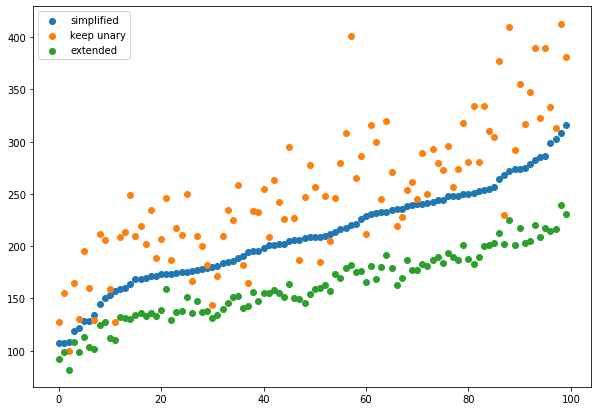

In [24]:
res = np.array(res)
x = np.argsort(np.argsort(res[:, 0]))

fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(x, res[:, 0], label='simplified')
ax.scatter(x, res[:, 1], label='keep unary')
ax.scatter(x, res[:, 2], label='extended')
ax.legend();